# 14 Classification Task dengan Decision Tree

Source : [Indonesia Belajar](https://www.youtube.com/watch?v=5wwXKtLkyqs&t=1s)

Referensi: [https://en.wikipedia.org/wiki/Decision_tree_learning](https://en.wikipedia.org/wiki/Decision_tree_learning)

## Konsep Dasar

Decision Tree adalah salah satu metode yang digunakan dalam tugas klasifikasi dalam machine learning. Metode ini bekerja dengan membagi data ke dalam kelompok-kelompok berdasarkan fitur-fitur yang ada, melalui serangkaian keputusan yang disusun dalam bentuk pohon. Pada setiap node atau simpul dalam pohon, data dibagi berdasarkan fitur yang paling signifikan dalam menentukan klasifikasi, hingga mencapai daun (leaf) yang menunjukkan hasil akhir dari klasifikasi. Decision Tree mudah dipahami dan diinterpretasikan, namun dapat menjadi kompleks dan rentan terhadap overfitting jika pohon yang dihasilkan terlalu dalam atau terlalu rumit.

### Terminology: root node, internal node, leaf node

<div>
<img src="./images/decision_tree_example.png" width="600">
</div>

### Gini Impurity

<div>
    <img src="./images/gini_example.png" width="400">
</div>

#### Ruas Kiri:

$
\begin{align*} 
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - P(biru)^2 \\
  &= 1 - (\frac{4}{4})^2 = 0
\end{align*}
$

#### Ruas Kanan:

$
\begin{align*}
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - (P(biru)^2 + P(hijau)^2)\\
  &= 1 - ( (\frac{1}{6})^2 + (\frac{5}{6})^2 ) = 0.278
\end{align*}
$


#### Average Gini Impurity:

$
\begin{align*}
G &= \frac{4}{4+6} \times 0 + \frac{6}{4+6} \times  0.278 \\
  &= 0.1668
\end{align*}
$

### Information Gain

<div>
    <img src="./images/information_gain.png" width="500">
</div>

### Membangun Decision Tree

<div>
    <img src="./images/build_decision_tree.png" width="900">
</div>

$
\begin{align*} 
G &= 1 - (P(apple)^2 + P(grape)^2 + P(lemon)^2) \\
   &=1 - ( (\frac{2}{5})^2 + (\frac{2}{5})^2 + (\frac{1}{5})^2 ) \\
   &= 0.63
\end{align*}    
$

In [6]:
1 - ( (2/5)**2 + (2/5)**2 + (1/5)**2 )

0.6399999999999999

In [7]:
import pandas as pd

# Data pelatihan contoh yang terdiri dari warna, diameter, dan label (jenis buah).
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

# Label kolom untuk data pelatihan.
# Label-label ini digunakan hanya untuk mencetak pohon dan membuat data lebih mudah dipahami.
header = ["Color", "Diameter", "Label"]

# Membuat DataFrame menggunakan data pelatihan dan header yang ditentukan.
pd.DataFrame(training_data, columns=header)

,Color,Diameter,Label
0,Green,3,Apple
1,Yellow,3,Apple
2,Red,1,Grape
3,Red,1,Grape
4,Yellow,3,Lemon


## Dataset

Referensi: [https://en.wikipedia.org/wiki/Iris_flower_data_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [8]:
from sklearn.datasets import load_iris

# Memuat dataset Iris
X, y = load_iris(return_X_y=True)

# Menampilkan dimensi feature dan kelas
print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


In [9]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan set pengujian
# 70% data akan digunakan untuk pelatihan dan 30% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan `DecisionTreeClassifier`

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Membuat model Decision Tree dengan kedalaman maksimal 4
model = DecisionTreeClassifier(max_depth=4)

# Melatih model menggunakan data pelatihan
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

## Visualisasi Model

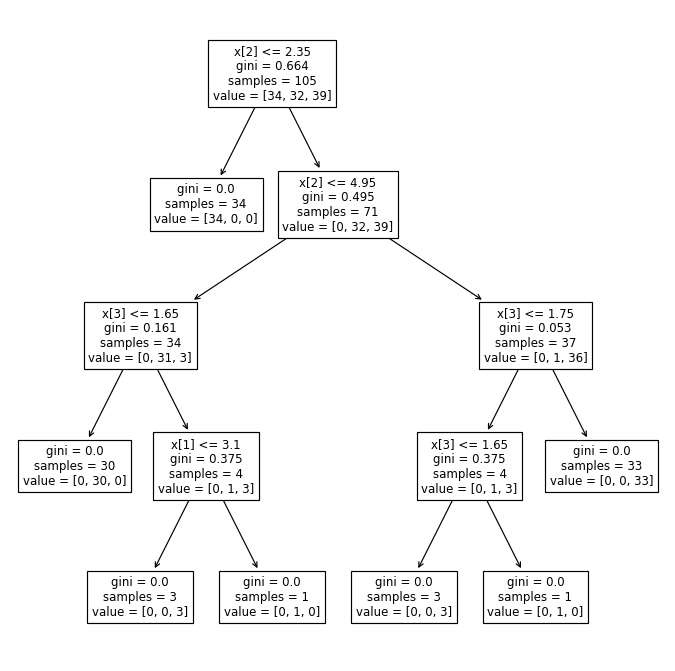

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

# Mengatur resolusi gambar
plt.rcParams['figure.dpi'] = 85

# Membuat plot dengan ukuran 10x10
plt.subplots(figsize=(10, 10))

# Memvisualisasikan pohon keputusan
tree.plot_tree(model, fontsize=10)
plt.show()

## Evaluasi Model

In [12]:
from sklearn.metrics import classification_report

# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

# Mencetak laporan klasifikasi yang membandingkan hasil prediksi dengan label yang sebenarnya
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

